# Atividade 05 - Implementação da fase forward

Para esta atividade deve ser feita uma base para o problema XOR, que deve ter somente 4 exemplos e não vai ter separação de treino e teste.

A arquitetura apresentada no fórum que trata sobre a fase forward do backpropagation deve ser implementada, em uma classe que herde BaseEstimator, ClassifierMixin. Os pesos podem ser devidos "manualmente" dentro do método fit. Só a fase forward será implementada. Portanto, só o método predict (ou predict_proba) deve ser implementado usando os cálculos que discutimos no fórum.

Apresente um gráfico mostrando a separação das classes usando um meshgrid, como feito nas tarefas anteriores.

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoide
from matplotlib.colors import ListedColormap
from sklearn.base import BaseEstimator, ClassifierMixin
import warnings
warnings.filterwarnings("ignore")

In [97]:
# CARREGAMENTO DOS DADOS

X = np.array([[0, 0], [0, 1],
              [1, 0], [1, 1]])

y = np.array([0, 1, 1, 0])

In [98]:
class RedeNeuralXOR(BaseEstimator, ClassifierMixin):
    "Implementa uma rede neural com 3 camadas (entrada, oculta, saída)"
    
    # Inicializa a rede neural
    def __init__(self):
        # Pesos inseridos "manualmente":
        self.w_hidden = [[3.9, 9.0], [3.9, 9.0]]
        self.b_hidden = [[-5.8, -5.8]]
        self.w_output = [[-11.8],[10.3]]
        self.b_output = [[-4.2]]
        
        # A função de ativação é a sigmóide ou função logística
        self.funcao_ativacao = lambda x: sigmoide(x)
    
    # Treina a rede neural
    def fit(self, X, y):
        y_hidden = self.funcao_ativacao(np.dot(X, self.w_hidden) + self.b_hidden)
        y_output = self.funcao_ativacao(np.dot(y_hidden, self.w_output) + self.b_output)
    
    # Executa uma query na rede neural
    def predict(self, X):
        y_hidden = self.funcao_ativacao(np.dot(X, self.w_hidden) + self.b_hidden)
        return self.funcao_ativacao(np.dot(y_hidden, self.w_output) + self.b_output)

In [99]:
# Cria uma instância da classe RedeNeuralXOR
rede_neural_xor = RedeNeuralXOR()

# Fit (não tem muito sentido pois o peso foi fixado manualmente - apenas parte forward)
rede_neural_xor.fit(X, y)

# Predict
rede_neural_xor.predict(X)

array([[0.01470827],
       [0.98465215],
       [0.98465215],
       [0.01347361]])

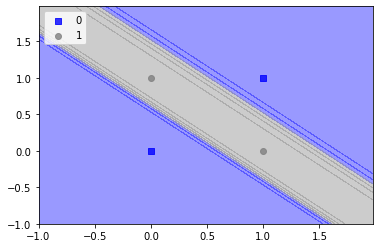

In [109]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    ""
    # setup marker generator and color map
    markers = ('s', 'o', 'x', '^', 'v')
    colors = ('blue', 'gray', 'red', 'lightgreen', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=cmap(idx), marker=markers[idx], label=cl)
        
plot_decision_regions(X, y, rede_neural_xor)
plt.legend(loc='upper left')
plt.show()

## Referências utilizadas
https://flipdazed.github.io/blog/python%20tutorial/introduction-to-neural-networks-in-python-using-XOR  
https://chih-ling-hsu.github.io/2017/08/30/NN-XOR  